# Introduction

In this laboratory, you will get acquainted to the basic visualization techniques for the Exploratory Data Analysis (EDA). You will deal with charts to
- analyze a data distribution, like **histograms**, **boxplots** and **violin plots**
- explore relationships and (linear) correlations in your data, like **scatterplots** or **heatmaps**
- visualize the trend and some salient information of a **time series**.

Choosing the right type of chart for the type of data at hand is a never ending job. Some [communities](https://www.reddit.com/r/dataisbeautiful/) took it seriously since a while. You will soon find yourself eager to test many approaches: this laboratory will help you getting started.  

## Structure

Each main section of the notebook introduces one of the chart categories listed above. Within the sections, you will find a brief description of type of plot you are required to build, along with a short snippet of code that produces the chart on syntetic data.

The whole notebook is written in **Python**. The code level is introductory: if your are a Python master, bear with me. On the other hand, not all the functions are described, but their functioning can be easily inferred either by the name or the output.   

For your convenience, some parts of the notebook are pre-compiled, we filled the boilerplate code for you. Although the notebook is sequential, each section is self-contained: feel free to skip back and forth you are more interested in specific parts.
  
---
 
So, to recap. Let's say your client provides you and your team a large set of raw, unprocessed data and you are the one in charge to do a first EDA pass. And you happen to know Python.

![Data Viz](https://venngage-wordpress.s3.amazonaws.com/uploads/2020/06/image17.png)

# Before we start: Python & Co.

Python is the *standard de-facto* ecosystem for data scientists and practitionaires. If I had to summarized its advantages over other languages like R, or even some GUI-enabled tools, I would say:

- a large, well-documented standard library, and a *huge* number of third-part libraries for virtually *everything* you need
- a large, supportive community with a lot of resources
- modern Python keeps the syntax at a minimum. To run data science and visualization experiments, the python code almost reduces to *plain english*
- a series of online tools that let you experiment with the language: you only need a Google Account to create [Colab](https://colab.research.google.com/notebook) Notebooks, and the same applies for [Kaggle](https://www.kaggle.com/), [Deepnote](https://deepnote.com/), and many more.

In this laboratory, we will use three popular libraries: [NumPy](https://numpy.org/devdocs/index.html), [pandas](https://pandas.pydata.org/docs/) and [seaborn](https://seaborn.pydata.org/). Let's run the cell below to check and install all the dependecies for these libraries (do not worry about warnings).

In [1]:
!pip install --quiet --user numpy
!pip install --quiet --user pandas
!pip install --quiet --user seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


#### Imports

We can import them now (along with other useful standard libraries) and provide an alias with:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# set the style for all the charts in the notebook
sns.set_theme("notebook")

from os.path import join


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


### Data Manipulation

NumPy and Pandas let you easily handle numerical arrays and tabular data respectively.
Simply put, NumPy (or numpy in the following) is your best companion for the Geometry class, while Pandas provides you a table-like access to your data (with index and column names, and so on). "Tables" in pandas are known as DataFrames.

They have been thoroughly covered in the course Data Science Lab: process and methods at Politecnico di Torino. If you are interest, feel free to visit the [course website](https://dbdmg.polito.it/wordpress/teaching/data-science-lab-process-and-methods-2020-2021/) for slides and laboratories.

To give a practical example, let's see how we can create a simple array with all the integers between 0 (included) and 100 (excluded) in numpy: 

In [3]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

or a 3x3 matrix with random floating point numbers from 0 and 1:

In [4]:
np.random.random((3,3))

array([[0.72751039, 0.61672231, 0.64162094],
       [0.84559223, 0.60244603, 0.25619901],
       [0.08723056, 0.31726772, 0.03106302]])

For pandas instead, let's create a toy table-like dataset:

In [5]:
toy_df = pd.DataFrame(
    {
        "Age": [22, 43, 19, 23, 55],
        "Gender": ["Male", "Female", "Female", "Male", "Female"],
        "Origin": ["Italy", "France", "France", "USA", "USA"]
    }
)
toy_df

Age  Gender  Origin
0   22    Male   Italy
1   43  Female  France
2   19  Female  France
3   23    Male     USA
4   55  Female     USA

### Data Visualization

The most used library for data visualization in python is [matplotlib](https://matplotlib.org/). However, in this laboratory, you will use **seaborn**.
Seaborn is a matplotlib wrapper which provides simpler-to-use, high-level APIs to produce charts with better quality and lower effort. It integrates pandas off-the-shelf and provides [an extended list](https://seaborn.pydata.org/api.html) of chart types already implemented. You better take a look at it: most of the cases the chart you are trying to achieve manually is already there.

If you want to do something low-level, like changing the size for all the future figures in the notebook, you have to use matplolib. Let us do it for you.

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 4)

## Datasets

You will deal with two different types of data.

First, we will focus on tabular data, with the [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

Next, we will do some finance. We collected the ticker prices of eight publicly traded companies, namely Amazon (AMZN), AAPL (AAPL), Alphabet Inc (GOOG), Microsoft (MSFT), Johnson & Johnson (JNJ), Pfizer (PFE), Sanofi (SNY), and AstraZeneca (AZN). Not by coincidence, four of them belong to the tech sector, and the rest to healthcare.

Run the cell below to download and extract the datasets.

In [7]:
!wget -q https://dbdmg.polito.it/wordpress/wp-content/uploads/2021/05/datasets_Data_Theory_Python.zip -O datasets.zip
!unzip -qu datasets.zip
!rm datasets.zip

# Exercise 1. Tabular Data: Stroke Prediction Dataset

The dataset collects information on patients that are likely to get stroke. Each row of the dataset contains relevant information about a patient, like gender, age, various diseases, and smoking status.

(From Kaggle) The attributes are:

- **id**: unique identifier
- **gender**: "Male", "Female" or "Other"
- **age**: age of the patient
- **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married**: "No" or "Yes"
- **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- **Residence_type**: "Rural" or "Urban"
- **avg_glucose_level**: average glucose level in blood
- **bmi**: body mass index
- **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- **stroke**: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Reading and parsing the dataset with pandas is as simple as:

In [8]:
stroke_df = pd.read_csv(join("datasets", "healthcare-dataset-stroke-data.csv"))
stroke_df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

## Explore Data Distribution

Let's now build some of the most common charts to analyze data distribution: **histograms**, **box plots** and **violin plots** with seaborn. More advanced configurations can be achieved with **displot** (generic distribution plot), or **catplot** for "category plot".

Before addressing the real dataset, let's create a few syntetic data points to test the searborn APIs.

In [9]:
synt = np.random.random(1000)
synt.shape

(1000,)

We can then plug them into one of the various *histplot*, *boxplot* or *violinplot* already available in seaborn. *Note that boxplots and violinplots cannot directly be applied to non-numerical variables as they show distributions. Histplot, instead, can display simple counts for each value of a categorical variable.* 

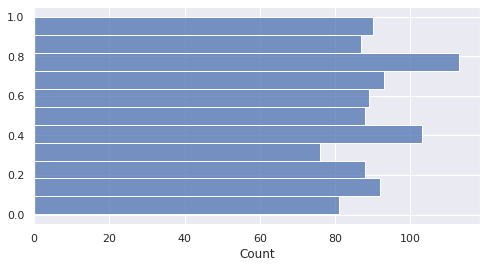

In [10]:
sns.histplot(y=synt)

From the output, we can see that the method np.random.random samples points from a uniform distribution between 0 and 1.
As previously mentioned, seaborn comes integrated with pandas. You can call any of its plotting methods specifying a dataframe to the `data` argument and a column name for the other parameters, like `x` in the previous cell. 

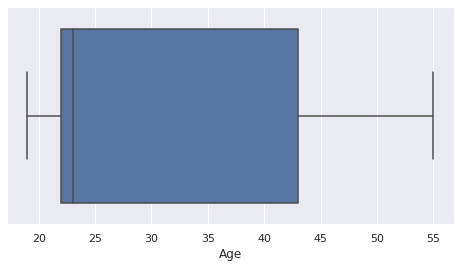

In [11]:
sns.boxplot(x="Age", data=toy_df)

Across almost all its functions, seaborn let's you easily separate the plot based on a variable of interest. You can specify it with the parameter `hue`:

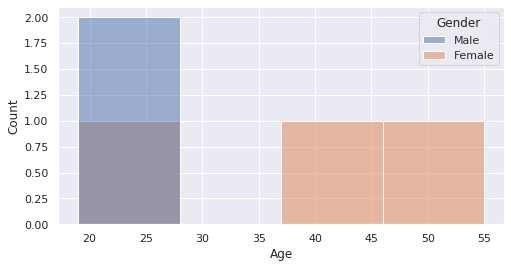

In [12]:
sns.histplot(x="Age", hue="Gender", data=toy_df)

---

Let's now analyze the real stroke dataset. Specifically, try to answer the following questions:

- Q1: what is the age distribution of patients?
- Q2: are there more male or female smokers?
- Q3: how is the age distributed for people who got stroke and those who did not?

In [13]:
#### TODO: YOUR CODE HERE (~10 minutes)

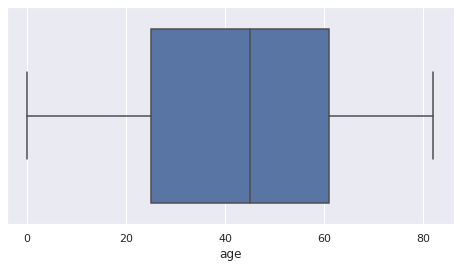

In [14]:
# Q1
sns.boxplot(x="age", data=stroke_df)

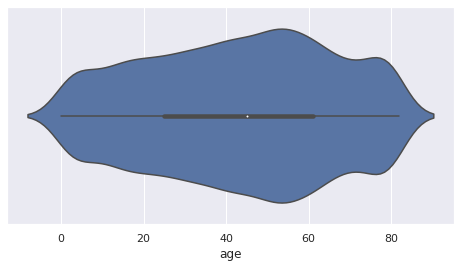

In [15]:
# Q1 alternative
sns.violinplot(x="age", data=stroke_df)

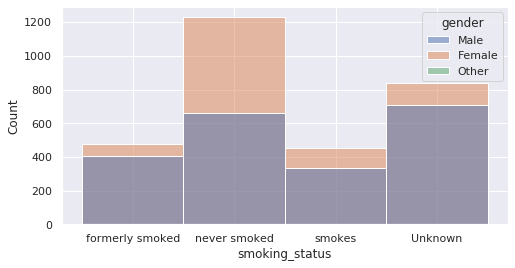

In [16]:
# Q2
sns.histplot(x="smoking_status", data=stroke_df, hue="gender")

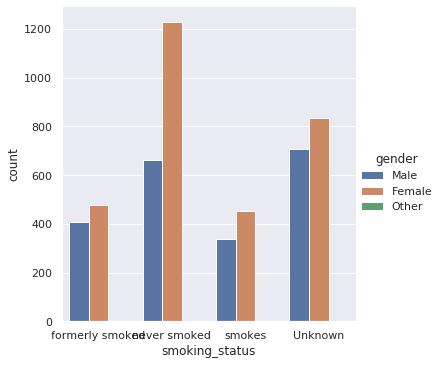

In [17]:
# Q2 alternative
sns.catplot(x="smoking_status", data=stroke_df, kind="count", hue="gender")

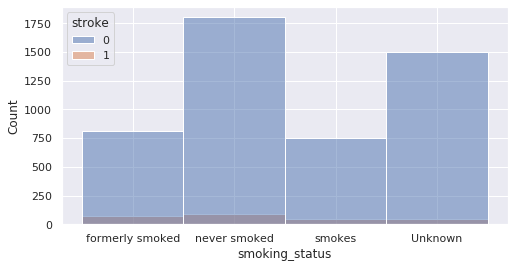

In [18]:
# Q3
sns.histplot(x="smoking_status", data=stroke_df, hue="stroke")

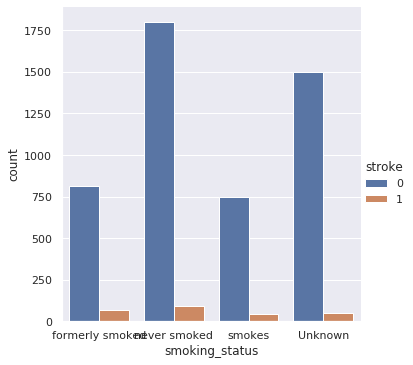

In [19]:
sns.catplot(x="smoking_status", data=stroke_df, kind="count", hue="stroke")

## Explore Data Correlation

Let's now focus on exploring data correlation in our dataset. We will mainly use scatterplot and, again, **displot**. The latter is a versatile function that accepts either a single or two inputs.

Again, let's start with a few syntetic data points.

In [20]:
synt = np.random.normal(size=(1000, 2))
synt.shape

(1000, 2)

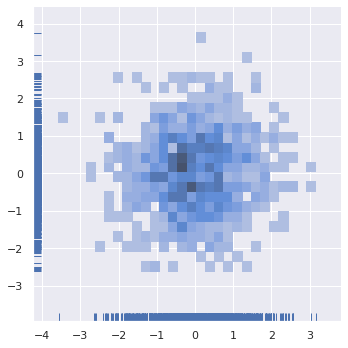

In [21]:
sns.displot(x=synt[:, 0], y=synt[:, 1], kind="hist", rug=True)

Here we changed the generator: np.random.normal, as per its name, draws data point from a normal distribution. The displot plots the first 1000 points (`synt[:, 0]`) on the horizontal axis and the second 1000 points (`synt[:, 1]`) on the vertical axis. The `rug=True` its a nice addition: it adds small segments corresponding to data points on a single dimension (mathematicians will tell you that those are the two marginal distributions).

Similarly, the **scatterplot** results in:

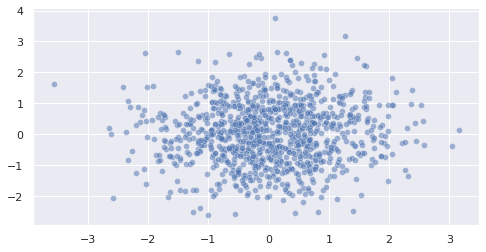

In [22]:
sns.scatterplot(x=synt[:, 0], y=synt[:, 1], alpha=0.5) # alpha: "opacity"

---

Let's now analyze the real stroke dataset. Specifically, try to answer the following questions:

- Q1: what is the correlation between the body mass index and average glucose level?
- Q2: what is the correlation between the body mass index and average glucose level, separately by stroke yes/no?
- Q3: what it the correlation between the body mass index, the average glucose level, and the age?
- Q4: what it the correlation between the body mass index, the average glucose level, the age, and the probability of get stroke?

*Note: to answer Q2 and Q3 dive into the documentation of scatterplot/displot and search for color and/or size*

In [23]:
#### TODO: YOUR CODE HERE (~10 minutes)

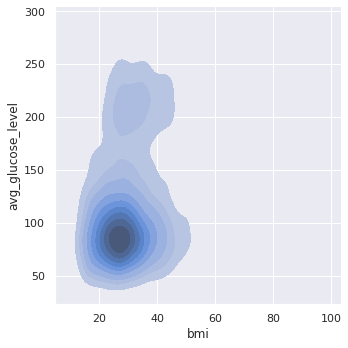

In [24]:
# Q1
sns.displot(x="bmi", y="avg_glucose_level", data=stroke_df, kind="kde", fill=True)

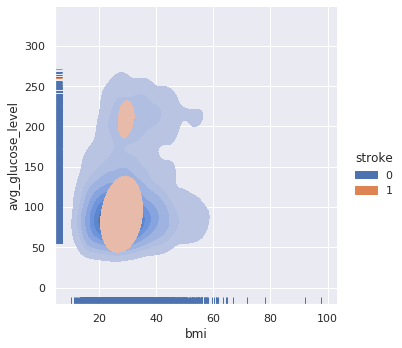

In [25]:
# Q2
sns.displot(x="bmi", y="avg_glucose_level", data=stroke_df, kind="kde", hue="stroke", fill=True, rug=True)

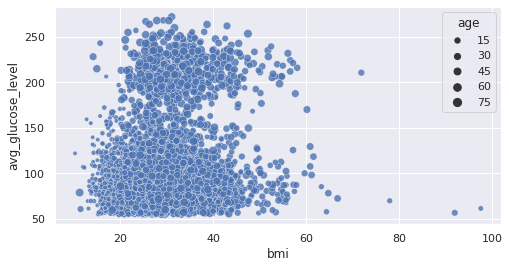

In [26]:
# Q3
sns.scatterplot(x="bmi", y="avg_glucose_level", data=stroke_df, size="age", alpha=0.8)

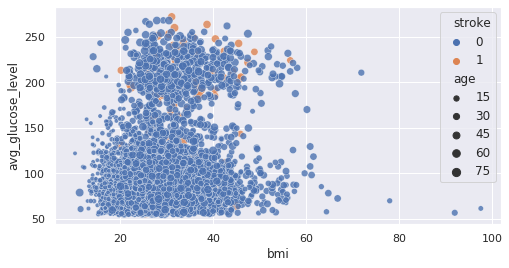

In [27]:
# Q4
sns.scatterplot(x="bmi", y="avg_glucose_level", data=stroke_df, size="age", alpha=0.8, hue="stroke")

## The easiest way

Seaborn provides you a single method that generates multiple type of correlation plots in a single figure. Let's try **pairplot**.

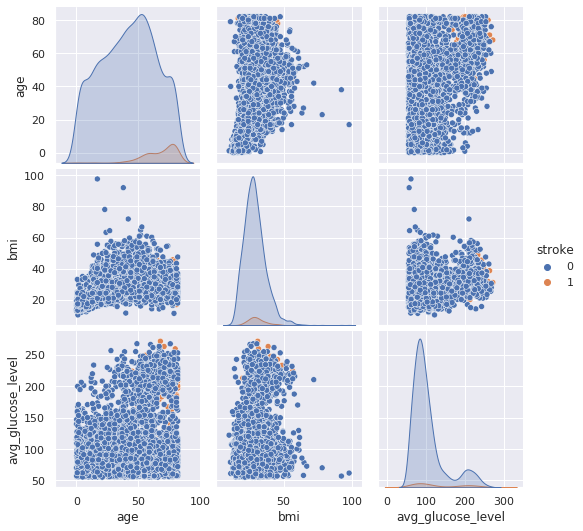

In [28]:
sns.pairplot(data=stroke_df, vars=["age", "bmi", "avg_glucose_level"], hue="stroke")

# Exercise 2. Financial Time Series

We switch now to a completely different domain: financial time series. We have the candlestick values (Open, High, Low, Close, Adjusted Close, and Volume) of eight public companies. The stock data is separated in different files. Each file contains the OHLCV values in tabular format: each row corresponds to a trading day. Our data is two-years long, from May 1, 2019 to May 1, 2021.

The time series will give use the opportunity two use two more types of chart: **lineplot** and **heatmap**.
First, we load them into a dictionary with company names as keys and pandas dataframes as values.

Then, for each ticker, we also add a new column representing the *percentage_change* between the current day's close and the previous one.

$$ pct\_change_t = \frac{(close_t - close_{t-1})}{close_{t-1}} $$

In [30]:
tech = ["AAPL", "AMZN", "GOOG", "MSFT"] 
healthcare = ["JNJ", "PFE", "SNY", "AZN"]
tickers = tech + healthcare

ticker_dfs = {
    tick: pd.read_csv(join("datasets", f"{tick}.csv"), parse_dates=True, index_col="Date")
    for tick in tickers
}

# add pct_change
for _, tick_df in ticker_dfs.items():
    tick_df["pct_change"] = tick_df["Close"].pct_change()

ticker_dfs["AAPL"].head()

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-05-01  52.470001  53.827499  52.307499  52.630001  51.550426  259309200   
2019-05-02  52.459999  53.162498  52.032501  52.287498  51.214951  127985200   
2019-05-03  52.722500  52.959999  52.557499  52.937500  51.851620   83569600   
2019-05-06  51.072498  52.209999  50.875000  52.119999  51.050892  129772400   
2019-05-07  51.470001  51.855000  50.207500  50.715000  49.674709  155054800   

            pct_change  
Date                    
2019-05-01         NaN  
2019-05-02   -0.006508  
2019-05-03    0.012431  
2019-05-06   -0.015443  
2019-05-07   -0.026957

## Explore trend and search co-trending stocks

The syntax of seaborn methods is the same also for the next charts. If we want to analyze a single series, we can simply pass it to the parameter `data`, seaborn will take care of the rest (axis scaling, choose the right labels for days, etc.).  

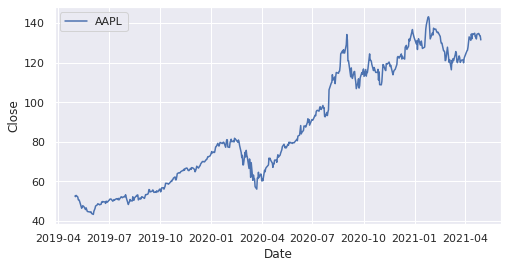

In [31]:
sns.lineplot(data=ticker_dfs["AAPL"]["Close"], label="AAPL")

In all the previous examples we run a single plot per cell. Try now to execute several lineplot in the same cell, specifically plot:
- Q1: the Close series for all the healthcare stocks
- Q2: the pct_change series for all the tech stocks

In [32]:
# TODO: YOUR CODE HERE (~10 mins)

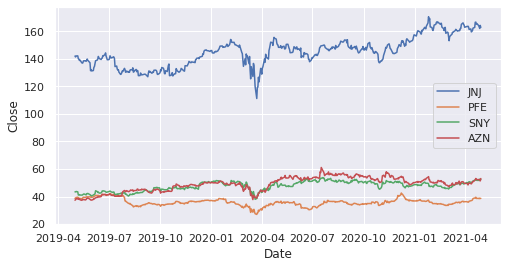

In [33]:
# Q1
for tick in healthcare:
    sns.lineplot(data=ticker_dfs[tick]["Close"], label=tick)

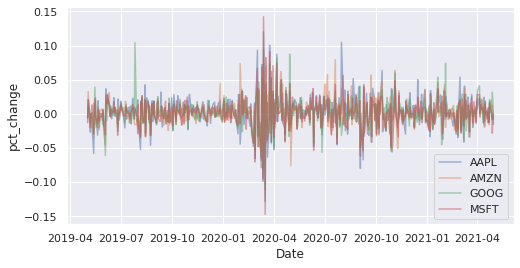

In [34]:
# Q2
for tick in tech:
    sns.lineplot(data=ticker_dfs[tick]["pct_change"], label=tick, alpha=0.5)

The last chart is pretty much garbage. Let's **search for co-trending behaviors** in another way. Let's go through the following steps:
1. collect in a new dataframe only the pct_change series
2. compute the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) for each pair of series. A strong correlation of any two series signals that the two stocks were moving very similarly
3. plot a heatmap chart to easily spot correlations 

In [35]:
pct_change_df = pd.DataFrame({tick: ticker_dfs[tick]["pct_change"] for tick in tickers})
pct_change_df.head()

AAPL      AMZN      GOOG      MSFT       JNJ       PFE  \
Date                                                                     
2019-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
2019-05-02 -0.006508 -0.005598 -0.004683 -0.013059 -0.004720  0.005887   
2019-05-03  0.012431  0.032428  0.019602  0.021314  0.005167  0.009266   
2019-05-06 -0.015443 -0.006069  0.003366 -0.005818  0.000563  0.006282   
2019-05-07 -0.026957 -0.015150 -0.012855 -0.020523 -0.014920 -0.019688   

                 SNY       AZN  
Date                            
2019-05-01       NaN       NaN  
2019-05-02 -0.001152  0.007229  
2019-05-03  0.007380  0.020999  
2019-05-06 -0.006181 -0.001562  
2019-05-07 -0.052753 -0.009648

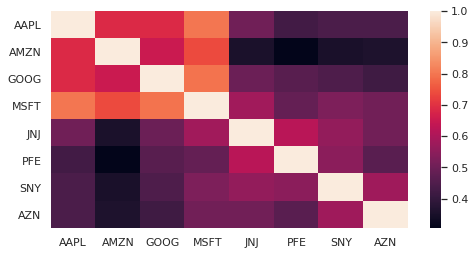

In [36]:
sns.heatmap(pct_change_df.corr())

We can still improved the chart a bit. Since we know that the Pearson correlation goes from -1 (negatively correlated - if one increase, the other one decreases) to 1 (positively correlated - if one increases, the other one does the same), **we can set the color scale to match the range \[-1, 1\]. Search the heatmap documentation and add this change**. 

In [37]:
# TODO: YOUR CODE HERE (~5 mins)

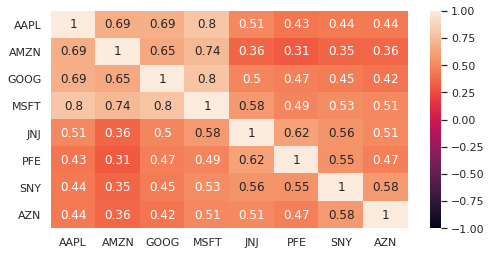

In [38]:
# Q3
sns.heatmap(pct_change_df.corr(), vmin=-1, vmax=1, annot=True)

# Conclusion (and what we have left aside)

In this laboratory we have introduced many of the basic types of charts offered by the seaborn library. The API is vaste though, and we are far from having completely explored it all. Furthermore, note that custom, low-level charts require the a solid knowledge of the inner matplotlib functioning, but that went beyond the scope of the laboratory. 

On the other hand, we have left aside other charting strategies, such as **part-whole** visualizations, or plots that help visualizing **rankings**.

Finally, other charts complete the landscape. **Maps** are a completely different matter, and require specific, more advanced libraries. The same applies to **wordclouds** (and in general textual representations).

# Bonus. Interactivity

We want to give you a final pointer to the topic of interactive charting. One of the most used open source charting library for interactivity is [plotly](https://plotly.com/graphing-libraries/). The library is available for Python, R, and Javascript.

The class names are different, the name of the functions are different but the syntax of the [plotly-express](https://plotly.com/python/plotly-express/) interface is similar to seaborn.

The following cells install plotly for python and produce the lineplot and the correlation heatmap drawn with seaborn before, but with interactivity enabled.

#### DISCLAIMER

At the time of writing, Plotly is not fully supported by Jupyter Lab. In order to run and see the results of the last cell, you have to switch to the classical Jupyter Notebook interface. You can do it by simply replacing *lab* with *tree* in the current URL string.

In [39]:
!pip install --quiet --user plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [40]:
import plotly.express as px

In [41]:
fig = px.line(ticker_dfs["AAPL"]["Close"], title="AAPL: Close Price")
fig.show()

In [42]:
fig = px.imshow(pct_change_df.corr(), title="Close Price Correlation")
fig.show()

# Credits

This notebook was created by [Giuseppe Attanasio](https://gattanasio.cc), PhD student @ Politecnico di Torino.
You are free to download, edit and publish newer versions of the notebook.

Credit to *fedesoriano* for sharing the Stroke Prediction Dataset on Kaggle.
Ticker data is retrieved from Yahoo Finance.

*v1: 02/05/2021*
